In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

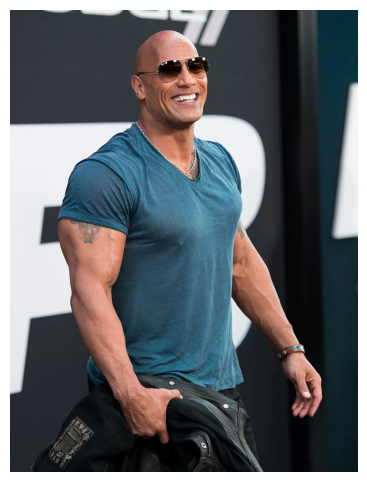

In [5]:
# load the image
img = cv2.imread('therock.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img)

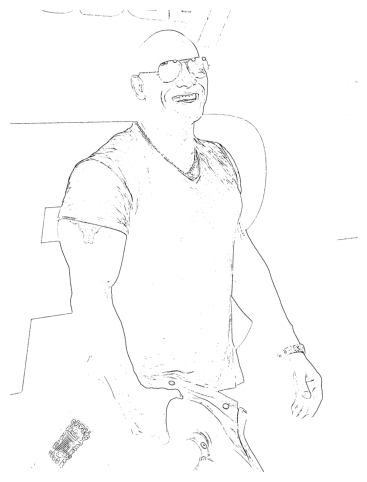

In [7]:
# edge mask generation
line_size = 7
blur_value = 7

gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.medianBlur(gray_img, blur_value)
edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)


plt.axis("off")
plt.imshow(edges, cmap='gray')

In [14]:
 #Color quantization with KMeans clustering
from sklearn.cluster import KMeans

k = 9
data = img.reshape(-1, 3)

kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
img_reduced = kmeans.cluster_centers_[kmeans.labels_]
img_reduced = img_reduced.reshape(img.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


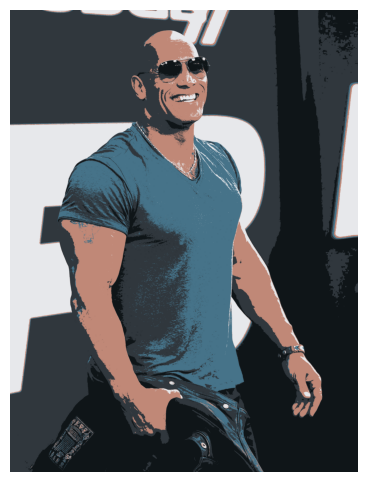

In [13]:
img_reduced = img_reduced.astype(np.uint8)

plt.axis("off")
plt.imshow(img_reduced)